In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
target_names = {idx:name for idx,name in enumerate(iris.target_names.tolist())}
irisDF['target_names'] = irisDF['target'].replace(target_names)

irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


In [2]:
def show_scatter(x, y, hue, data):
    ax = sns.scatterplot(x=x, y=y, data=data, hue=hue)
    plt.legend()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

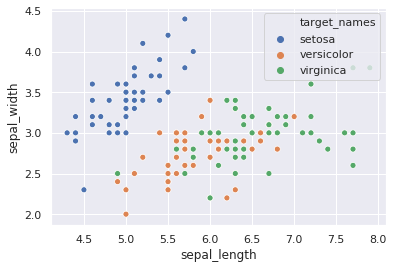

In [3]:
show_scatter(x="sepal_length", y="sepal_width", data=irisDF, hue="target_names")

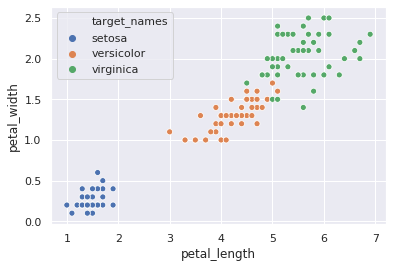

In [4]:
show_scatter(x="petal_length", y="petal_width", data=irisDF, hue="target_names")

### t-SNE

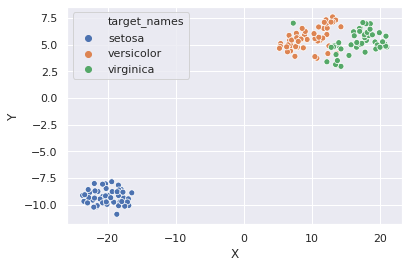

In [5]:
from sklearn.manifold import TSNE

data = irisDF.values[:,:4]
data_embedded = TSNE(n_components=2).fit_transform(data)
embed_df = pd.DataFrame(data_embedded, columns=["X" , "Y"])
embed_df = pd.merge(embed_df, irisDF, left_index=True, right_index=True)
show_scatter(x="X", y="Y", data=embed_df, hue="target_names")

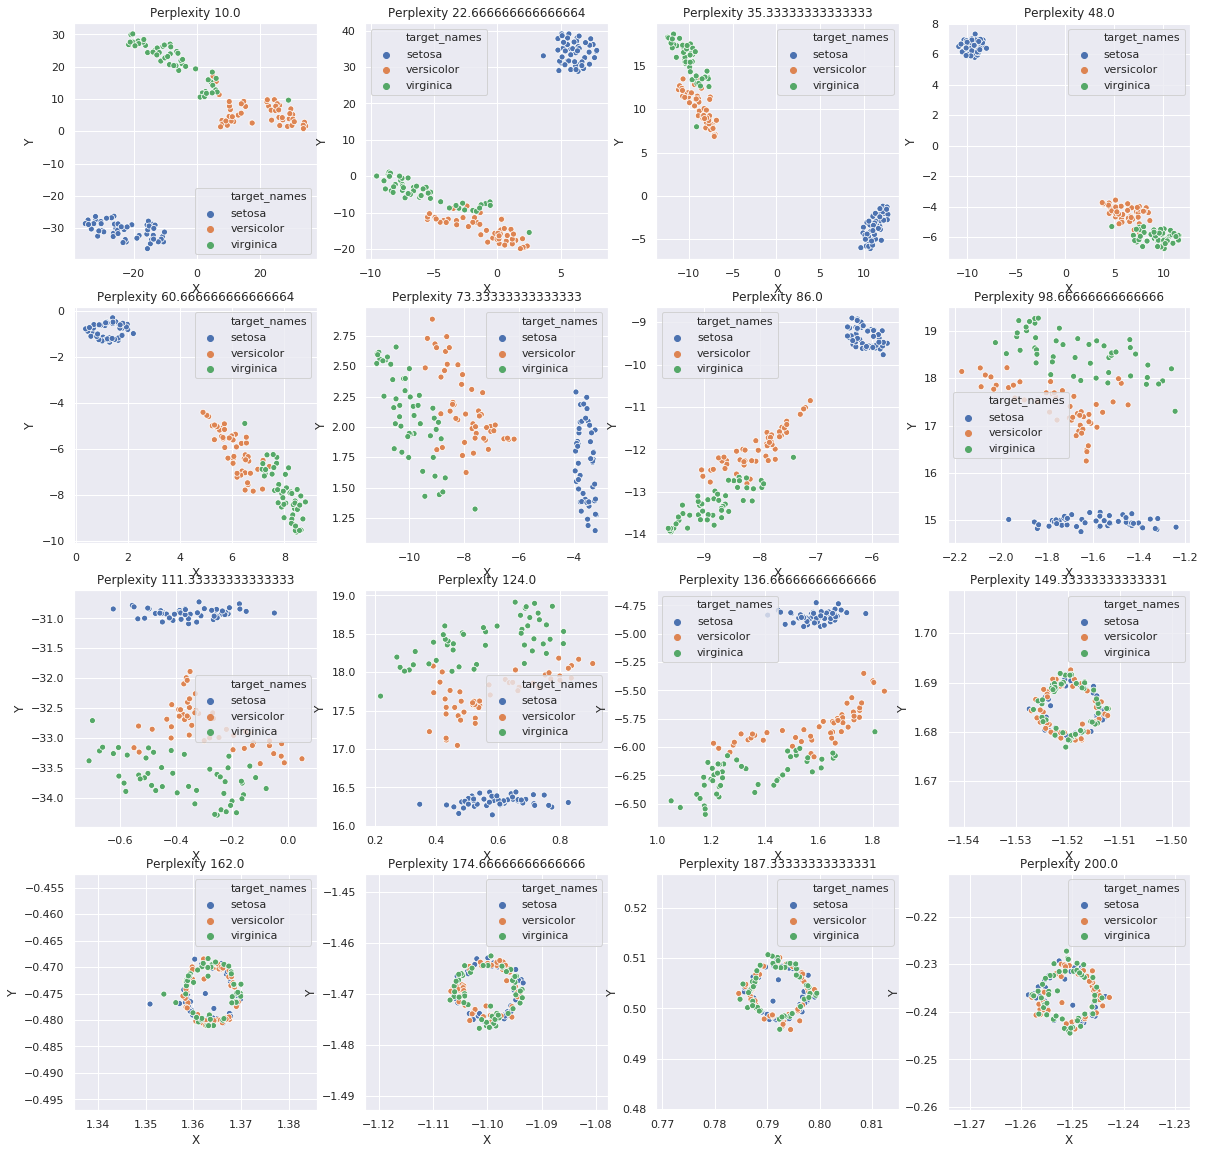

In [33]:
import numpy as np

data = irisDF.values[:,:4]
data_embedded = TSNE(n_components=2).fit_transform(data)
embed_df = pd.DataFrame(data_embedded, columns=["X" , "Y"])
embed_df = pd.merge(embed_df, irisDF, left_index=True, right_index=True)


f, axes = plt.subplots(4, 4,  figsize=(20, 20))
values = np.linspace(10, 200, num=16).reshape(4,4)
for i in range(4):
    for x in range(4):
        data_embedded = TSNE(n_components=2, perplexity=values[i,x]).fit_transform(data)
        embed_df = pd.DataFrame(data_embedded, columns=["X" , "Y"])
        embed_df = pd.merge(embed_df, irisDF, left_index=True, right_index=True)
        sns.scatterplot(  y="Y", x= "X", data=embed_df,  hue='target_names',ax=axes[i][x]) 
        ax = axes[i][x]
        ax.set_title("Perplexity {}".format(values[i,x]))


plt.show()

### PCA

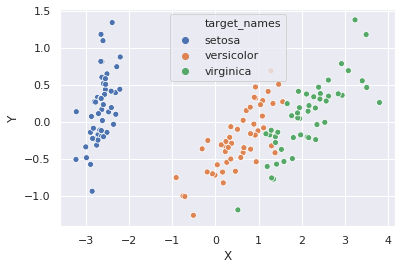

In [34]:
from sklearn.decomposition import PCA

data = irisDF.values[:,:4]
data_embedded = PCA(n_components=2).fit_transform(data)
embed_df = pd.DataFrame(data_embedded, columns=["X" , "Y"])
embed_df = pd.merge(embed_df, irisDF, left_index=True, right_index=True)
show_scatter(x="X", y="Y", data=embed_df, hue="target_names")

### LDA

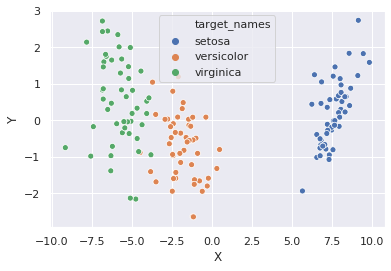

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

data = irisDF.values[:,:4]
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(data, irisDF.target)
data_embedded = lda.transform(data)
                         
embed_df = pd.DataFrame(data_embedded, columns=["X" , "Y"])
embed_df = pd.merge(embed_df, irisDF, left_index=True, right_index=True)
show_scatter(x="X", y="Y", data=embed_df, hue="target_names")

### SVD

In [36]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [37]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


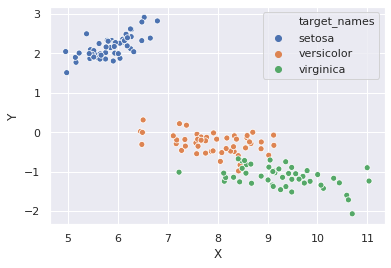

In [39]:
from sklearn.decomposition import TruncatedSVD


data = irisDF.values[:,:4]
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(data)
data_embedded = tsvd.transform(data)
                         
embed_df = pd.DataFrame(data_embedded, columns=["X" , "Y"])
embed_df = pd.merge(embed_df, irisDF, left_index=True, right_index=True)
show_scatter(x="X", y="Y", data=embed_df, hue="target_names")